<a href="https://colab.research.google.com/github/waxxeBinita/MusicRecommender/blob/main/Recommend_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files


In [14]:
#1.importing data 
uploaded = files.upload()

Saving m.data.csv to m.data.csv


In [15]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "m.data.csv" with length 247 bytes


In [16]:
#Read the data
import io
df = pd.read_csv(io.StringIO(uploaded['m.data.csv'].decode('utf-8')))
print(df)

    age  gender      genre
0    20       1     HipHop
1    23       1     HipHop
2    25       1     HipHop
3    26       1       Jazz
4    29       1       Jazz
5    30       1       Jazz
6    31       1  Classical
7    33       1  Classical
8    37       1  Classical
9    20       0      Dance
10   21       0      Dance
11   25       0      Dance
12   26       0   Acoustic
13   27       0   Acoustic
14   30       0   Acoustic
15   31       0  Classical
16   34       0  Classical
17   35       0  Classical


In [ ]:
#Get shape 
df.shape

(18, 3)

In [ ]:
#get head
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [ ]:
#2. cleaning and preparing data if required. 
#3. Split the data into training and test sets
X= df.drop(columns=['genre']) #creating input sets by dropping genre form df
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [ ]:
#creating an output data sets 
y = df['genre']
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [ ]:
#building a model using inbuilt machine learning algorithm, decision tree with scikit learn
model= DecisionTreeClassifier()
model.fit(X.values, y)

#predicting a preferance of 27 year old male and 33 year old female music choice and more predictions
pred = model.predict([[27,1], [33,0]])
#pred = model.predict([[24,1], [28,0]])
#pred = model.predict([[21,1], [23,0]])
#pred = model.predict([[28,1], [22,0]])
pred


array(['Jazz', 'Dance'], dtype=object)

In [ ]:
#calculating accuracy of the model
#4.split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#building a model using inbuilt machine learning algorithm, decision tree with scikit learn
#model= DecisionTreeClassifier()
model.fit(X_train, y_train)
#predicting a preferance of 27 year old male music choice
predictions = model.predict(X_test)
#testing accuracy
Score= accuracy_score(y_test, predictions)
print(Score)


(14, 2) (4, 2) (14,) (4,)
1.0


In [ ]:
#predicting model
joblib.dump(model,'music-recommender.joblib')


['music-recommender.joblib']

In [ ]:
# load the model from disk
#model= joblib.load(model,'music-recommender.joblib','rb')
predictions= model.predict([[21,1]])
print(predictions)

['HipHop']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#decision tree visualization
df
X= df.drop(columns=['genre']) #creating input sets by dropping genre form df
X

#creating an output data sets 
y = df['genre']
y

#building a model using inbuilt machine learning algorithm, decision tree with scikit learn
#model= DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

model.fit(X.values, y)

DecisionTreeClassifier()

In [ ]:
tree.export_graphviz(model,out_file='music-recommender.dot', feature_names=['age', 'gender'], 
                     class_names=sorted(y.unique()), 
                     label='all', 
                     rounded=True, 
                     filled= True
                     )

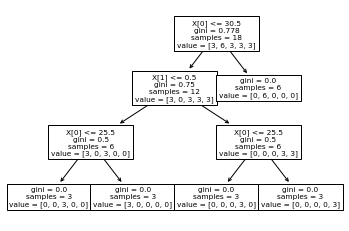

In [ ]:
#visualizing using matplotlib library functions
tree.plot_tree(model);

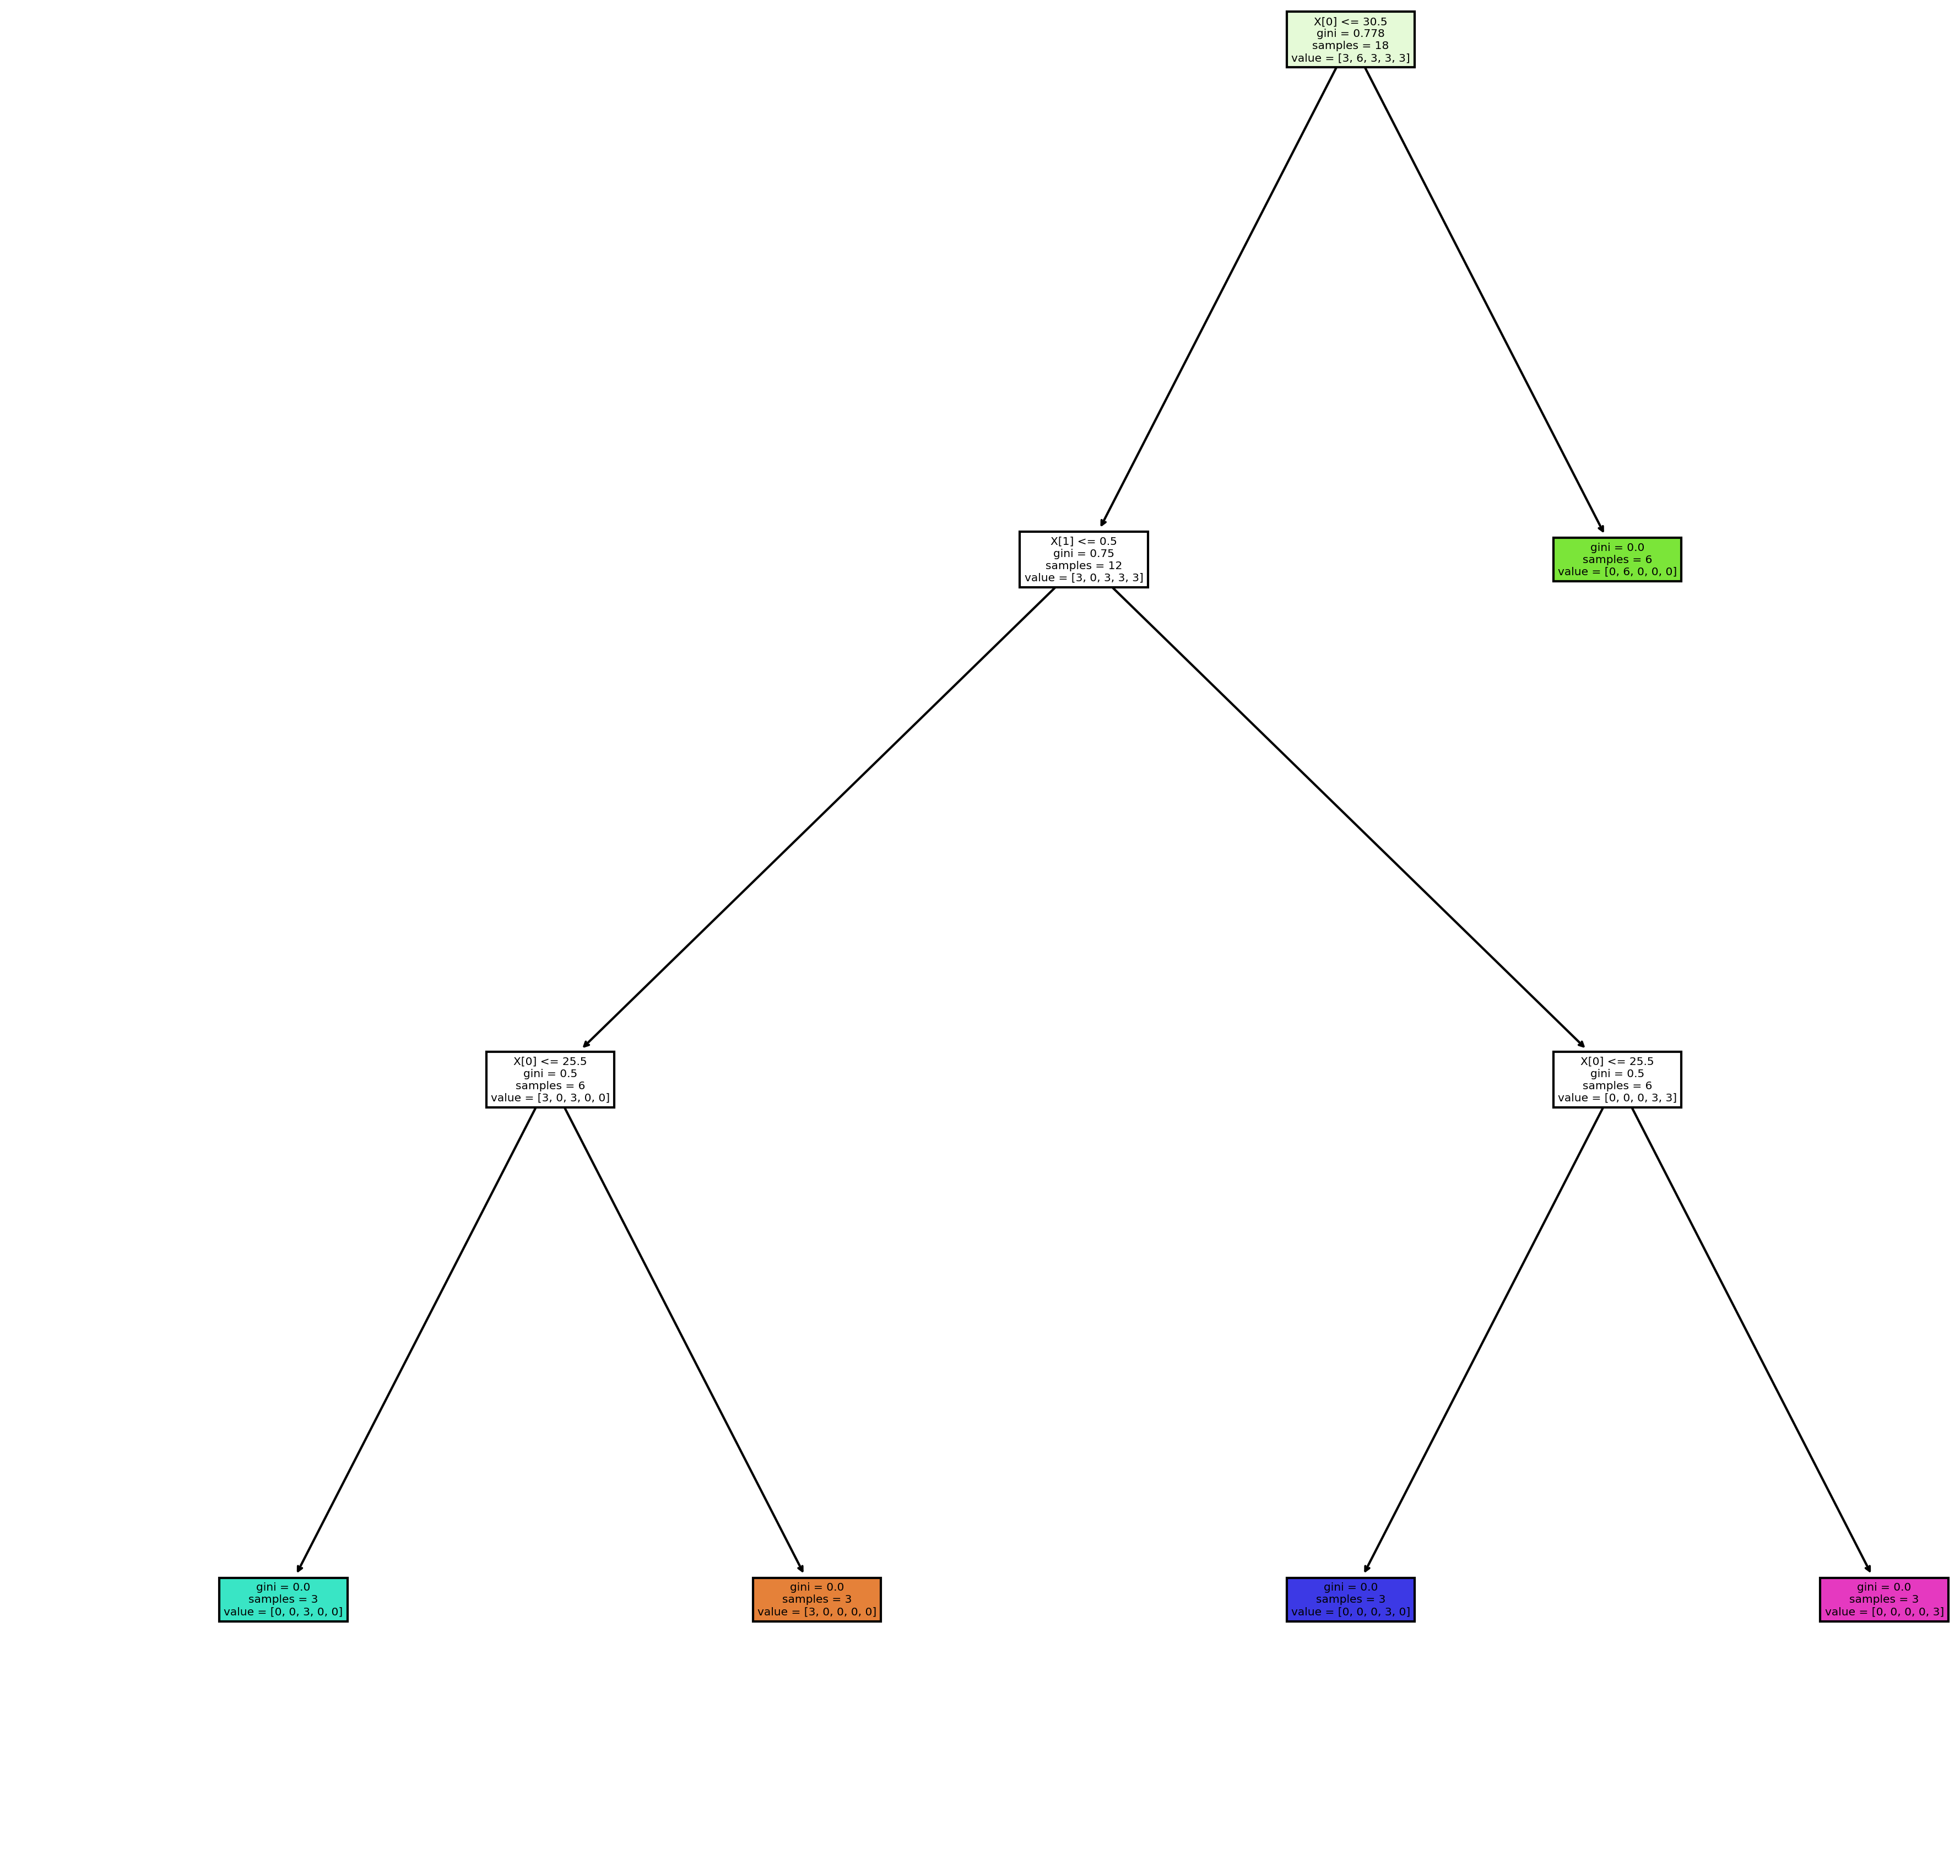

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               filled = True);
fig.savefig('imagename.png')